In [1]:
# packages
import numpy as np
import xlrd # to open excel
import math
import time

# Get data

In [2]:
!pwd

/Users/kenzaelhoussaini/code/kelhoussaini/Population_Pyramid_France_2017


In [3]:
#open xls file
file = xlrd.open_workbook('indic-struct-distrib-revenu-2018-COMMUNES/FILO2018_DEC_COM.xlsx',on_demand=True)

name = "ENSEMBLE"
sheet = file.sheet_by_name(name)

#print(sheet.__dict__.keys())

print("columns number   :", sheet.ncols) 
print("rows number   :", sheet.nrows) 


columns number   : 27
rows number   : 31333


In [4]:
cols_labels_txt = sheet.row(4)
cols_labels = [i.value for i in list(cols_labels_txt)]
cols_labels[:9]

['Code géographique',
 'Libellé géographique',
 'Nbre de ménages fiscaux',
 'Nbre de personnes dans les ménages fiscaux',
 "Nbre d'unités de consommation dans les ménages fiscaux",
 'Part des ménages fiscaux imposés (%)',
 '1er quartile (€)',
 'Médiane (€)',
 '3e quartile (€)']

In [5]:
index_col_mediane = np.where(np.asarray(cols_labels) == "Médiane (€)")[0][0]
index_col_mediane

7

In [6]:
# mediane column
# ================================
col_mediane_txt = sheet.col_slice(colx = index_col_mediane, start_rowx=6, end_rowx=sheet.nrows-1)

col_mediane = [i.value for i in col_mediane_txt]
print("len(col_mediane)   :", len(col_mediane))
col_mediane[:5]

len(col_mediane)   : 31326


[25430.0, 24240.0, 19920.0, 24560.0, 22890.0]

In [7]:
#comunes labels
# =================================
col_codegeo_index = sheet.col_slice(colx = 0, start_rowx=6, end_rowx=sheet.nrows-1)

col_codegeo = [i.value for i in col_codegeo_index]
print("len(col_codegeo)   :", len(col_codegeo))
col_codegeo[:5]

len(col_codegeo)   : 31326


['01001', '01002', '01004', '01005', '01007']

# Load data --> sheet "COM_2017"

In [18]:
file = np.load("comunes_data.npz")
len(file['arr_0'])

3

In [19]:
(comunes_DR_CR, res_comune, pop_comune) = file['arr_0']

# res_comune : total %pop aged 15-24 years, by comune
# pop_comune : total pop by comune
# comunes_DR_CR : comunes code insee DR+CR

In [20]:
len(comunes_DR_CR)

38213

In [21]:
pop_comune[:5]

array(['774.254876490623', '265.349794238683', '0', '14046.22813393976',
       '1663.687004322038'], dtype='<U18')

In [22]:
res_comune[:5]

array(['7.1315945996965295', '7.692307692307692', 'nan',
       '13.381461033884175', '13.360207908485581'], dtype='<U18')

In [23]:
# Remove elements of the 3 lists : comunes_DR_CR, res_comune, pop_comune
# where index of res_comune is nan
# =================================

res_comune = list(res_comune)
pop_comune = list(pop_comune)
comunes_DR_CR = list(comunes_DR_CR)

In [24]:
len(comunes_DR_CR), len(col_codegeo)

(38213, 31326)

In [25]:
for (i,j) in enumerate(res_comune):
    if j == 'nan':      
        #print(j, ".........", len(res_comune))
        del res_comune[i]
        del pop_comune[i]
        del comunes_DR_CR[i]

In [26]:
len(comunes_DR_CR), len(col_codegeo)

(35528, 31326)

In [27]:
res_comune_new = []
pop_comune_new = []
comunes_DR_CR_new = [] 
    
for (i,j) in enumerate(comunes_DR_CR):
    if j in col_codegeo:
        res_comune_new.append(res_comune[i]) 
        pop_comune_new.append(pop_comune[i]) 
        comunes_DR_CR_new.append(comunes_DR_CR[i]) 

len(comunes_DR_CR_new), len(col_codegeo)

(31243, 31326)

In [28]:
set_difference = set(col_codegeo) - set(comunes_DR_CR_new)
list_difference = list(set_difference)
list_difference[:3]

['13207', '97210', '13216']

In [29]:
ind = 6
print(sheet.col_slice(colx = 1, start_rowx=ind, end_rowx=ind+1))
print(sheet.col_slice(colx = 7, start_rowx=ind, end_rowx=ind+1))

[text:"L'Abergement-Clémenciat"]
[number:25430.0]


In [30]:
# print comunes that exist in the file : FILO2018_DEC_COM.xlsx, sheet_name = ENSEMBLE 
# and does not in pop-sexe-age-quinquennal6817.xls ----> sheet name = "COM_2017"

for i in np.arange(3):
    ss = list_difference[i]
    print(ss)
    ind = np.where(np.asarray(col_codegeo) == ss)[0][0]
    print(ind)
    print(sheet.col_slice(colx = 1, start_rowx=ind, end_rowx=ind+1))
    print(sheet.col_slice(colx = 7, start_rowx=ind, end_rowx=ind+1))
    print(111*"=")



13207
3719
[text:'Marseille 1er Arrondissement']
[number:12550.0]
97210
31278
[text:'Le Carbet']
[number:18320.0]
13216
3728
[text:'Marseille 10e Arrondissement']
[number:18600.0]


In [31]:
# There are still elements existing in len(comunes_DR_CR), len(col_codegeo)
len(comunes_DR_CR_new), len(col_codegeo)

(31243, 31326)

In [32]:
for i in list_difference:
    L = np.where(np.asarray(col_codegeo) == i)[0][0]
    del col_codegeo[L]
    del col_mediane[L]

len(comunes_DR_CR_new), len(col_codegeo)

(31243, 31243)

In [33]:
# check is the both lists are equal
comunes_DR_CR_new == col_codegeo

True

In [34]:
res_comune_new[:5], col_mediane[:5]
# res_comune_new : total %pop aged 15-24 years, by comune

(['7.1315945996965295',
  '7.692307692307692',
  '13.381461033884175',
  '13.360207908485581',
  '9.480292309232393'],
 [25430.0, 24240.0, 19920.0, 24560.0, 22890.0])

# Regression analysis --Plots

## Plot with regression line

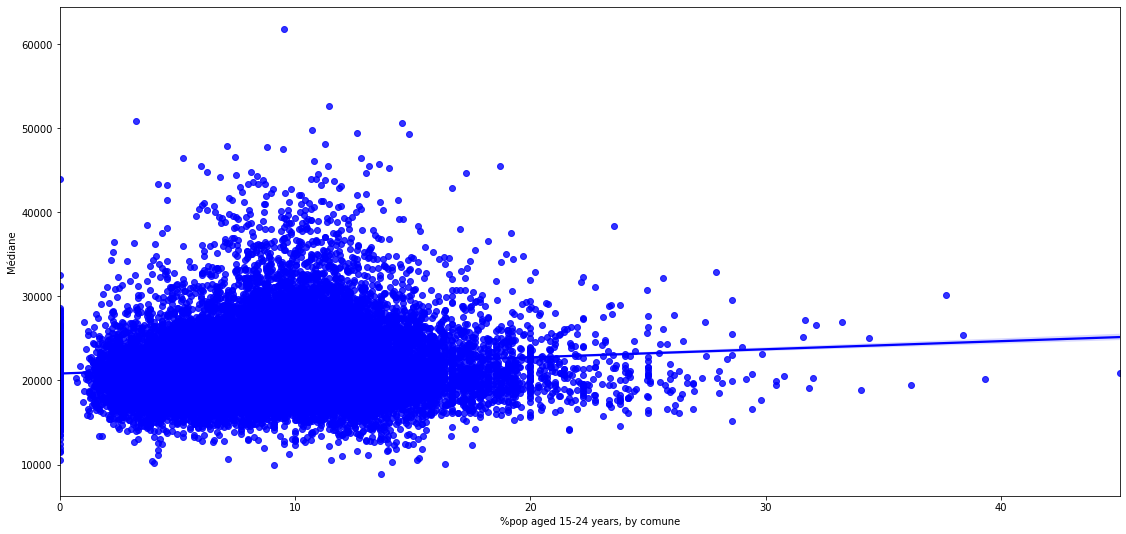

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (19, 9))

ax=sns.regplot(x=np.asarray(res_comune_new[:]).astype(np.float),
               y=np.asarray(col_mediane[:]).astype(np.float),
               color="b"); #..., scatter = False OR True

ax.set_ylabel("Médiane")
ax.set_xlabel("%pop aged 15-24 years, by comune");

(0.0, 20.0)

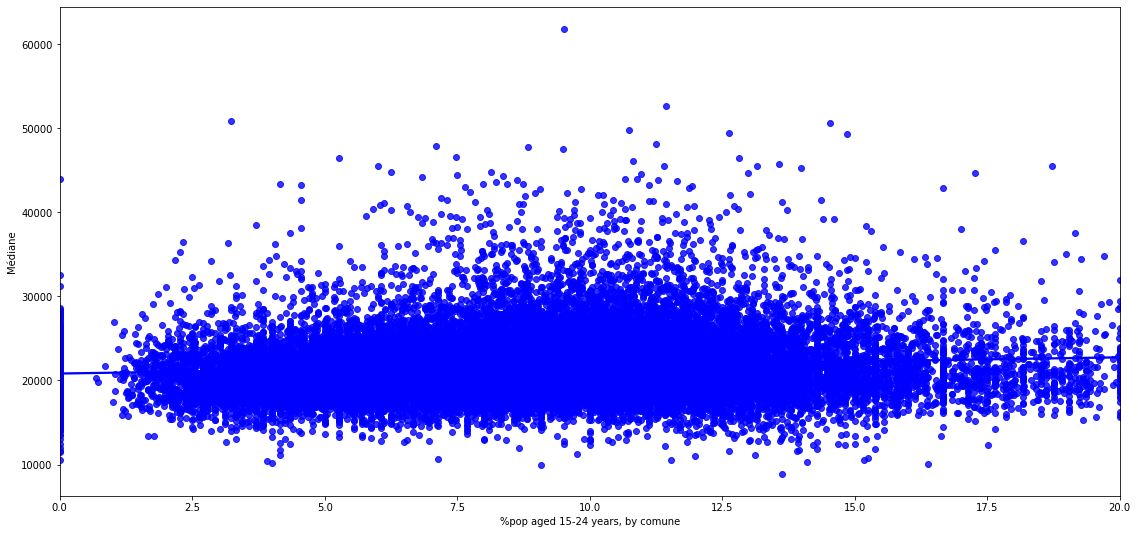

In [42]:
plt.figure(figsize = (19, 9))

ax=sns.regplot(x=np.asarray(res_comune_new[:]).astype(np.float),
               y=np.asarray(col_mediane[:]).astype(np.float),
               color="b"); #..., scatter = False OR True

ax.set_ylabel("Médiane")
ax.set_xlabel("%pop aged 15-24 years, by comune");

ax.set_xlim(0, 20)

## Plot scatter

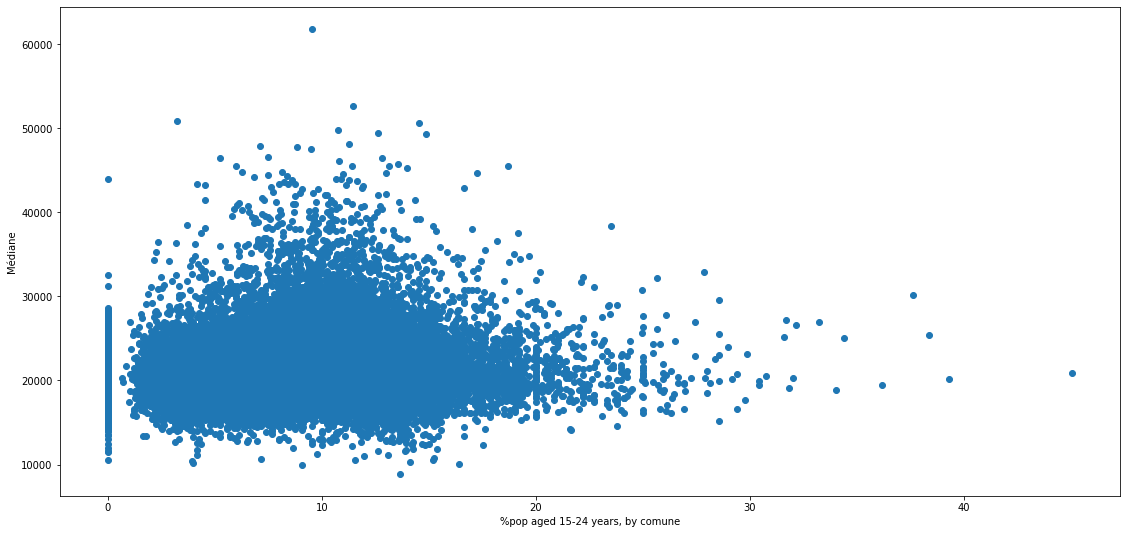

In [41]:
plt.figure(figsize = (19, 9))

plt.scatter(x=np.asarray(res_comune_new[:]).astype(np.float),
               y=np.asarray(col_mediane[:]).astype(np.float))

plt.ylabel("Médiane")
plt.xlabel("%pop aged 15-24 years, by comune");

# Regression Analysis

## using statsmodels.api

In [39]:
import statsmodels.api as sm

#define response variable
y = np.asarray(col_mediane[:]).astype(np.float)

#define explanatory variable
x = np.asarray(res_comune_new[:]).astype(np.float)

#add constant to predictor variables
x_sm = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x_sm).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     319.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           4.92e-71
Time:                        13:13:00   Log-Likelihood:            -3.0090e+05
No. Observations:               31243   AIC:                         6.018e+05
Df Residuals:                   31241   BIC:                         6.018e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.083e+04     53.257    391.064      0.0

In [51]:
# model = sm.OLS(y, x_sm).fit()
model.rsquared*100, model.pvalues[1]

(1.011358265324691, 4.920032174265695e-71)

In [53]:
# confidence interval  of coef : x1 & const
# ==============================================================================
interval_ci = model.conf_int(alpha=0.05)
interval_ci

array([[20722.40232077, 20931.17272126],
       [   85.64133129,   106.74821365]])

In [164]:
intervalos_ci[0]

array([20722.40232077, 20931.17272126])

In [ ]:
R2 : 0.01 ==> the model would explain 1% only of 
    the variance observed in "médiane_revenus", which is not sufficient

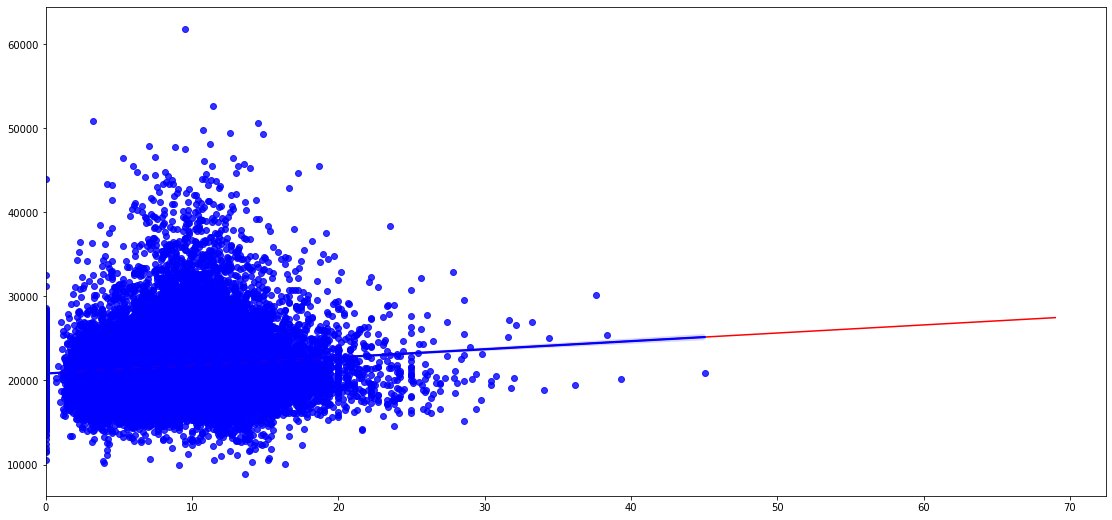

In [126]:
pourcentage_15_24 = np.arange(70)
mediane_revenus = 2.083*10**4 + 96.1948*pourcentage_15_24
plt.figure(figsize = (19, 9))

plt.plot( pourcentage_15_24, mediane_revenus, 'r')



ax=sns.regplot(x=np.asarray(res_comune_new[:]).astype(np.float),
               y=np.asarray(col_mediane[:]).astype(np.float), color="b"); #..., scatter = False OR True

## using sklearn

In [43]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x.reshape(-1, 1), y)

# y = b0 + b1*X
print("b1: ", reg.coef_)
print("b0: ", reg.intercept_)

#armar la ecuación y = b0 + b1*X
print("y = ", reg.intercept_, " + ", reg.coef_, "*X")

b1:  [96.19477247]
b0:  20826.787521017326
y =  20826.787521017326  +  [96.19477247] *X


In [49]:
reg.score(x.reshape(-1, 1), y)

0.01011358265324691

we get the same values as statsmodels.api

# Correlation between variables

In [50]:
# Correlation between variables
# ==============================================================================
from scipy.stats import pearsonr

#define response variable
y = np.asarray(col_mediane[:]).astype(np.float)

#define explanatory variable
x = np.asarray(res_comune_new[:]).astype(np.float)

corr_test = pearsonr(x = x, 
                     y =  y)
print("Correlation: coef Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])


Correlation: coef Pearson:  0.10056630973266914
P-value:  4.920032174294184e-71
